In [159]:
import numpy as np 
import pandas as pd
# 시각화 package
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

import matplotlib.font_manager as font_manager
from matplotlib import rc
   
# 한글폰트작업
# window의 폰트 위치 -> C:/Windows/Fonts/NGULIM.TTF
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NGULIM.TTF").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# from labeling_function import labeling

# <font color = 4247D6> Data Set

In [160]:
dataset = pd.read_csv("경진대회용 용해탱크 데이터셋.csv")
dataset

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [161]:
df = dataset.drop(['STD_DT', 'NUM'],axis=1)
df

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,OK
1,433,78,609,3.19,OK
2,464,154,608,3.19,OK
3,379,212,606,3.19,OK
4,798,1736,604,3.21,OK
...,...,...,...,...,...
835195,755,1743,318,3.21,OK
835196,385,206,317,3.19,OK
835197,465,148,316,3.20,OK
835198,467,0,314,3.19,OK


In [162]:
df.replace({'TAG': {'OK': 1, 'NG': 0}}, inplace=True)
df

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,1
1,433,78,609,3.19,1
2,464,154,608,3.19,1
3,379,212,606,3.19,1
4,798,1736,604,3.21,1
...,...,...,...,...,...
835195,755,1743,318,3.21,1
835196,385,206,317,3.19,1
835197,465,148,316,3.20,1
835198,467,0,314,3.19,1


# <font color = 5904DB> 분석 예측

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('TAG',axis=1)  
Y = df[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

## <font color = 0088DB> Logistic Regression 

C:\Users\islab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Set Accuracy : 78.24840357598978
Test Set Accuracy : 78.26676245210727

Confusion Matrix:
[[  1948   3136]
 [ 42243 161473]]

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.38      0.08      5084
           1       0.98      0.79      0.88    203716

    accuracy                           0.78    208800
   macro avg       0.51      0.59      0.48    208800
weighted avg       0.96      0.78      0.86    208800



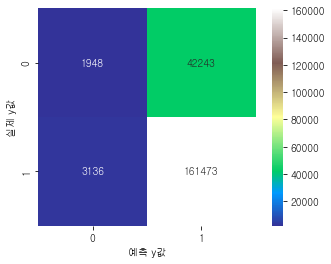

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2',C=0.1,random_state=1333)
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy : "+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy : "+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

confusion_dt = confusion_matrix(y_test, y_test_pred)
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

## <font color = 0088DB> Decision Tree Regression

C:\Users\islab\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


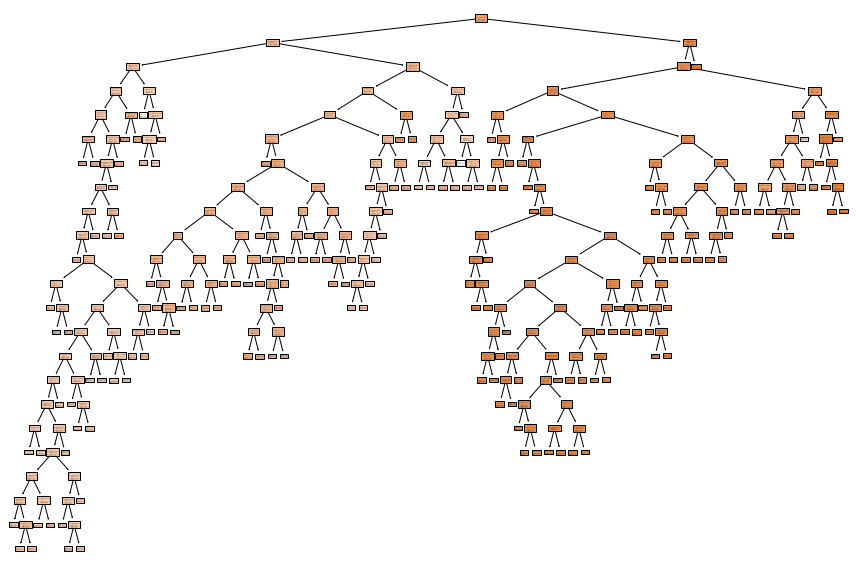

In [11]:
reg_tree = DecisionTreeRegressor(criterion="mse", min_samples_leaf=2500, random_state=1)
reg_tree.fit(X_train, y_train)

features = X.columns.tolist()
plt.figure(figsize=(12,8))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
# plt.savefig('treegerman1.png', dpi=500, transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

accuracy : 0.79416
0.7941618773946361
수행 시간: 3227.472초


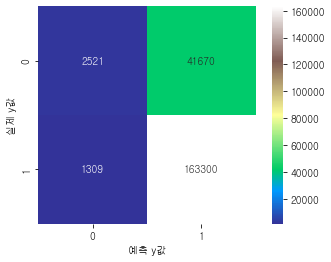

In [15]:
import time
start_time = time.time()
tmp_pred = [] # regression 에서 사후확률 구함, 0.5보다 크거나 같으면 1 작으면 0으로 맵핑
tmp_pred = reg_tree.predict(X_test).tolist()
tmp_pred = list(map(lambda x: 1 if x>=0.5 else 0, tmp_pred))
# for i in range(len(reg_tree.predict(X_test))):
#     if reg_tree.predict(X_test)[i] >= 0.5:
#         tmp_pred.append(1)
#     else:
#         tmp_pred.append(0)

y_test_list = y_test['TAG'].values.tolist()

acc = accuracy_score(y_test_list, tmp_pred) 
print('accuracy : {:.5f}'.format(acc))
print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

confusion_dt = confusion_matrix(y_test, tmp_pred)
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [12]:
features = X.columns.tolist()
target = Y.columns.tolist()

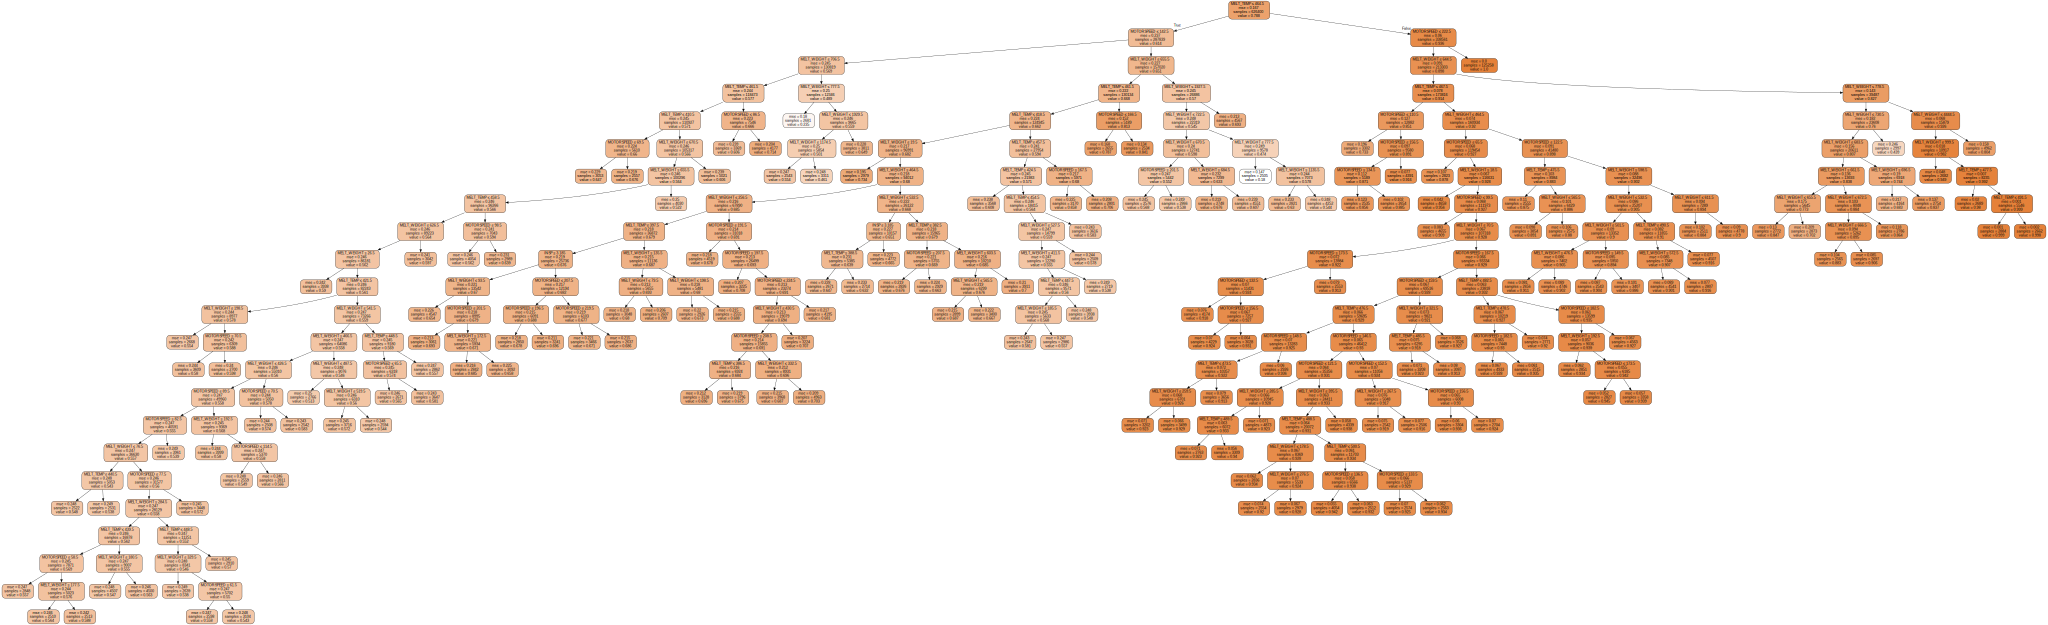

In [13]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(reg_tree,   # 의사결정나무 모형 대입
                           out_file = None,  # file로 변환할 것인가
                           feature_names = features,  # feature 이름
                           class_names = target,  # target 이름
                           filled = True,           # 그림에 색상을 넣을것인가
                           rounded = True,          # 반올림을 진행할 것인가
                           special_characters = True, # 특수문자를 사용하나
                           impurity=True) 

graph = graphviz.Source(dot_data)              
# from IPython.core.display import Image
# Image(filename='./test.png')
graph

# graph.write_png('tree_with_path.png')

In [14]:
graph.render(filename='Regression Tree', directory='./', format='png')

'Regression Tree.png'

## <font color = 0088DB> Decision Tree Classification

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion=terion='entropy', min_samples_leaf=2500, random_state=1)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('DecisionTreeClassifier: {:.5f}'.format(accuracy))

DecisionTreeClassifier: 0.79416


## <font color = 0088DB> Boost

### <font color = 0C5DF2> AdaBoost

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(n_estimators=30, 
                        random_state=1, 
                        learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('AdaBoost 정확도: {:.5f}'.format(accuracy_score(y_test, pred)))

C:\Users\islab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost 정확도: 0.78836


In [19]:
from sklearn.model_selection import GridSearchCV
start_time = time.time()
params = {
        "n_estimators": range(50, 100, 25),
        "learning_rate": [0.0001, 0.001, 0.01, 0.1]}

ab_clf = AdaBoostClassifier(random_state=1)
grid_cv = GridSearchCV(ab_clf, param_grid=params, n_jobs=-1, cv=3, scoring="roc_auc")
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.5f}'.format(grid_cv.best_score_))
print('AdaB 수행 시간: {:.1f}초'.format(time.time() - start_time))

C:\Users\islab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


최적 하이퍼 파라미터:  {'learning_rate': 0.1, 'n_estimators': 75}
최고 예측 정확도: 0.78966
AdaB 수행 시간: 82.6초


### <font color = 0C5DF2> GradientBoost

In [20]:
# Gradient Boosting Classifier 불러오기
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
import time

# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.5f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

C:\Users\islab\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBM 정확도: 0.79430
GBM 수행 시간: 35.7초


In [21]:
from sklearn.model_selection import GridSearchCV
start_time = time.time()
params = {
        "n_estimators": range(50, 100, 25),
        "max_depth": [1, 2, 4],
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "subsample": [0.7, 0.9],
        "max_features": [1, 3, 5, 7, 9]}

gb_clf = GradientBoostingClassifier(random_state=1)
grid_cv = GridSearchCV(gb_clf, param_grid=params, n_jobs=-1, cv=3, scoring="roc_auc")
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.5f}'.format(grid_cv.best_score_))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

C:\Users\islab\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


최적 하이퍼 파라미터:  {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 5, 'n_estimators': 75, 'subsample': 0.9}
최고 예측 정확도: 0.80228
GBM 수행 시간: 1935.7초


## <font color = 0088DB> Random Forest

C:\Users\islab\AppData\Local\Temp\ipykernel_6500\406220393.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


랜덤 포레스트 예측 정확도: 0.79152


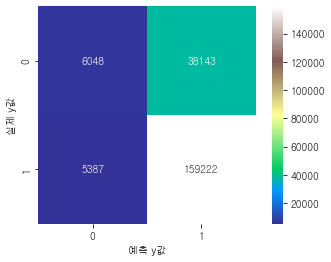

In [24]:
rf_clf = RandomForestClassifier(n_estimators=150, oob_score=True, 
                                criterion='entropy', min_samples_leaf=15, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

<AxesSubplot:>

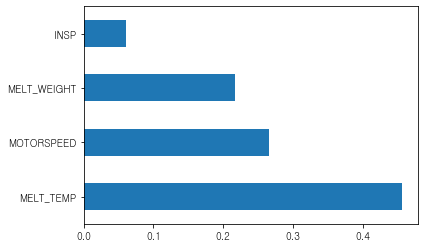

In [25]:
rfr = pd.Series(rf_clf.feature_importances_, index=X.columns)
rfr.nlargest(10).plot(kind='barh')
# plt.savefig('./rffeature.jpg', bbox_inches="tight")

In [26]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()
params = {'n_estimators' : [100, 200, 300, 400, 500],
         'min_samples_leaf': [10, 15, 20, 30, 40]}

rf_clf = RandomForestClassifier(random_state=1, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
print('RF 수행 시간: {:.1f}초'.format(time.time() - start_time))

C:\Users\islab\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터:  {'min_samples_leaf': 40, 'n_estimators': 300}
최고 예측 정확도: 0.7931
RF 수행 시간: 1567.4초


# <font color = E80C77> MELT_TEMP 제외

In [163]:
df_1 = df.drop('MELT_TEMP', axis=1)
df_1

,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,116,631,3.19,1
1,78,609,3.19,1
2,154,608,3.19,1
3,212,606,3.19,1
4,1736,604,3.21,1
...,...,...,...,...
835195,1743,318,3.21,1
835196,206,317,3.19,1
835197,148,316,3.20,1
835198,0,314,3.19,1


In [46]:
from sklearn.model_selection import train_test_split

X = df_1.drop('TAG',axis=1)  
Y = df_1[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

C:\Users\islab\AppData\Local\Temp\ipykernel_6500\406220393.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


랜덤 포레스트 예측 정확도: 0.78927


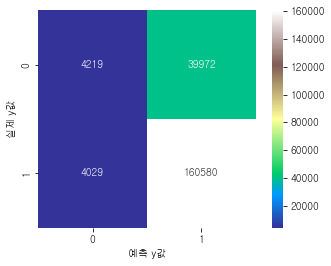

In [47]:
rf_clf = RandomForestClassifier(n_estimators=150, oob_score=True, 
                                criterion='entropy', min_samples_leaf=15, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

<AxesSubplot:>

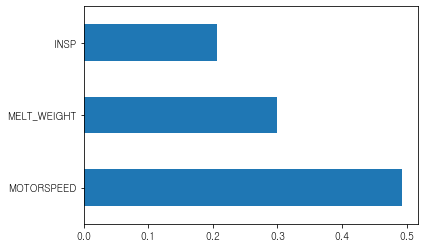

In [48]:
rfr = pd.Series(rf_clf.feature_importances_, index=X.columns)
rfr.nlargest(10).plot(kind='barh')
# plt.savefig('./rffeature.jpg', bbox_inches="tight")

In [32]:
# Gradient Boosting Classifier 불러오기
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
import time

# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.5f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

C:\Users\islab\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBM 정확도: 0.79428
GBM 수행 시간: 29.6초


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MELT_TEMP,835200.0,509.200623,128.277519,308.00,430.00,469.00,502.0,832.00
MOTORSPEED,835200.0,459.782865,639.436413,0.00,119.00,168.00,218.0,1804.00
MELT_WEIGHT,835200.0,582.962125,1217.604433,0.00,186.00,383.00,583.0,55252.00
INSP,835200.0,3.194853,0.011822,3.17,3.19,3.19,3.2,3.23
TAG,835200.0,0.787994,0.408729,0.00,1.00,1.00,1.0,1.00


<AxesSubplot:>

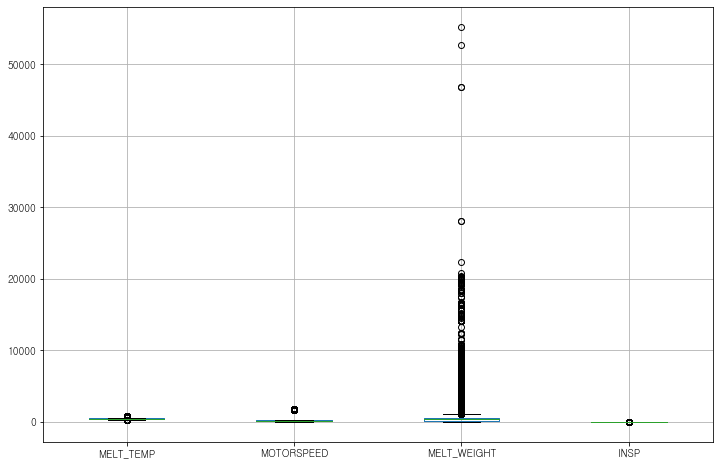

In [35]:
plt.figure(figsize=(12,8))
df.boxplot(column=['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP'])

array([[<AxesSubplot:title={'center':'MELT_TEMP'}>,
        <AxesSubplot:title={'center':'MOTORSPEED'}>],
       [<AxesSubplot:title={'center':'MELT_WEIGHT'}>,
        <AxesSubplot:title={'center':'INSP'}>],
       [<AxesSubplot:title={'center':'TAG'}>, <AxesSubplot:>]],
      dtype=object)

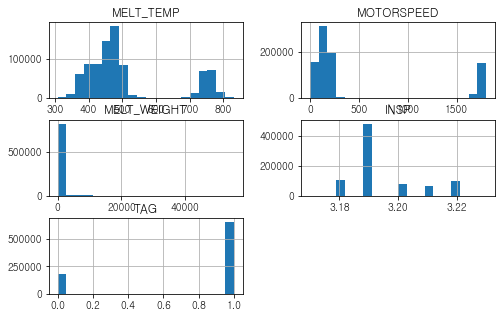

In [37]:
df.hist(bins=20, figsize=(8,5))

In [38]:
Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR = Q3 - Q1

In [39]:
df_IQR = df[(df['MELT_TEMP'] <= Q3['MELT_TEMP']+1.5*IQR['MELT_TEMP']) & (df['MELT_TEMP'] >= Q1['MELT_TEMP']-1.5*IQR['MELT_TEMP'])]
df_IQR = df[(df['MOTORSPEED'] <= Q3['MOTORSPEED']+1.5*IQR['MOTORSPEED']) & (df['MOTORSPEED'] >= Q1['MOTORSPEED']-1.5*IQR['MOTORSPEED'])]
df_IQR = df[(df['MELT_WEIGHT'] <= Q3['MELT_WEIGHT']+1.5*IQR['MELT_WEIGHT']) & (df['MELT_WEIGHT'] >= Q1['MELT_WEIGHT']-1.5*IQR['MELT_WEIGHT'])]
df_IQR = df[(df['INSP'] <= Q3['INSP']+1.5*IQR['INSP']) & (df['INSP'] >= Q1['INSP']-1.5*IQR['INSP'])]
df_IQR

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,1
1,433,78,609,3.19,1
2,464,154,608,3.19,1
3,379,212,606,3.19,1
4,798,1736,604,3.21,1
...,...,...,...,...,...
835195,755,1743,318,3.21,1
835196,385,206,317,3.19,1
835197,465,148,316,3.20,1
835198,467,0,314,3.19,1


In [122]:
df_IQR.describe().T

,count,mean,std,min,25%,50%,75%,max
MELT_TEMP,733621.0,475.351213,96.074306,308.00,422.00,462.00,487.00,830.00
MOTORSPEED,733621.0,283.699388,458.179648,0.00,110.00,157.00,200.00,1804.00
MELT_WEIGHT,733621.0,583.139355,1219.666383,0.00,186.00,383.00,583.00,55252.00
INSP,733621.0,3.191379,0.007693,3.18,3.19,3.19,3.19,3.21
TAG,733621.0,0.758728,0.427855,0.00,1.00,1.00,1.00,1.00


<AxesSubplot:>

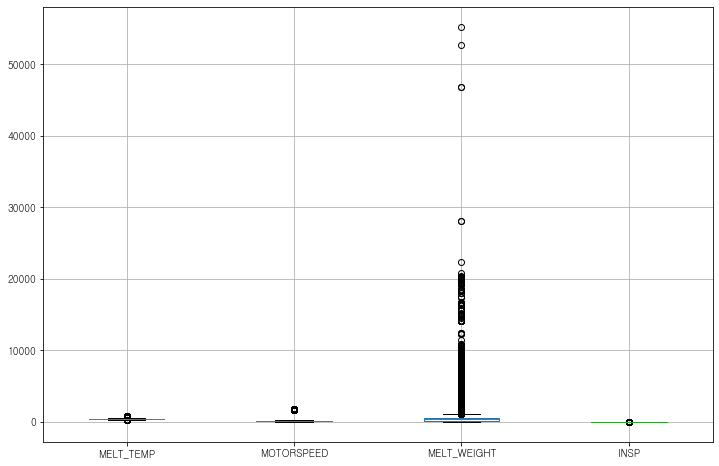

In [41]:
plt.figure(figsize=(12,8))
df_IQR.boxplot(column=['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP'])

In [49]:
from sklearn.model_selection import train_test_split

X = df_IQR.drop('TAG',axis=1)  
Y = df_IQR[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

C:\Users\islab\AppData\Local\Temp\ipykernel_6500\406220393.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


랜덤 포레스트 예측 정확도: 0.76330


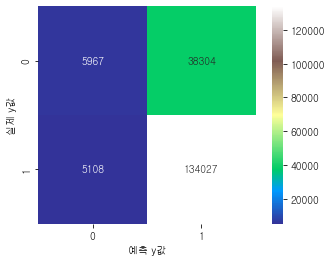

In [50]:
rf_clf = RandomForestClassifier(n_estimators=150, oob_score=True, 
                                criterion='entropy', min_samples_leaf=15, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

<AxesSubplot:>

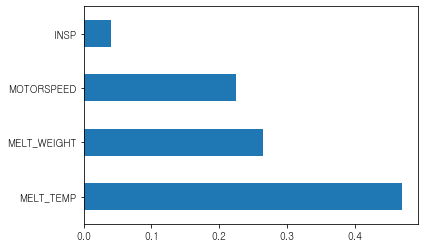

In [51]:
rfr = pd.Series(rf_clf.feature_importances_, index=X.columns)
rfr.nlargest(10).plot(kind='barh')
# plt.savefig('./rffeature.jpg', bbox_inches="tight")

In [44]:
# Gradient Boosting Classifier 불러오기
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
import time

# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.5f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

C:\Users\islab\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBM 정확도: 0.76698
GBM 수행 시간: 30.5초


# <font color = E80C77> MOTORSPEED 제외

In [53]:
df_2 = df.drop('MOTORSPEED', axis=1)
df_2

,MELT_TEMP,MELT_WEIGHT,INSP,TAG
0,489,631,3.19,1
1,433,609,3.19,1
2,464,608,3.19,1
3,379,606,3.19,1
4,798,604,3.21,1
...,...,...,...,...
835195,755,318,3.21,1
835196,385,317,3.19,1
835197,465,316,3.20,1
835198,467,314,3.19,1


In [54]:
from sklearn.model_selection import train_test_split

X = df_2.drop('TAG',axis=1)  
Y = df_2[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

C:\Users\islab\AppData\Local\Temp\ipykernel_6500\406220393.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


랜덤 포레스트 예측 정확도: 0.78943


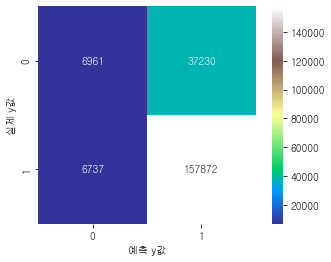

In [55]:
rf_clf = RandomForestClassifier(n_estimators=150, oob_score=True, 
                                criterion='entropy', min_samples_leaf=15, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

<AxesSubplot:>

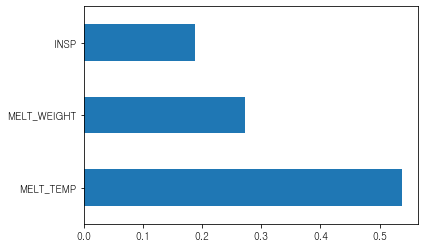

In [56]:
rfr = pd.Series(rf_clf.feature_importances_, index=X.columns)
rfr.nlargest(10).plot(kind='barh')
# plt.savefig('./rffeature.jpg', bbox_inches="tight")

# <font color = E80C77> INSP 제외

In [119]:
df_3 = df.drop('INSP', axis=1)
df_3

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
0,489,116,631,1
1,433,78,609,1
2,464,154,608,1
3,379,212,606,1
4,798,1736,604,1
...,...,...,...,...
835195,755,1743,318,1
835196,385,206,317,1
835197,465,148,316,1
835198,467,0,314,1


In [120]:
from sklearn.model_selection import train_test_split

X = df_3.drop('TAG',axis=1)  
Y = df_3[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

C:\Users\islab\AppData\Local\Temp\ipykernel_6500\406220393.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


랜덤 포레스트 예측 정확도: 0.79153


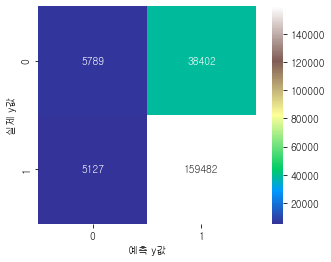

In [121]:
rf_clf = RandomForestClassifier(n_estimators=150, oob_score=True, 
                                criterion='entropy', min_samples_leaf=15, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

# <font color = red>RNN이나 LSTM, GRU 해봐야 될듯...

In [2]:
import math
import sklearn
import sklearn.preprocessing
import datetime
import tensorflow as tf

In [164]:
dataset_1 = dataset.copy()
dataset_1

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [165]:
dataset_1['STD_DT'] = pd.to_datetime(dataset_1['STD_DT'])
dataset_1

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 00:00:00,0,489,116,631,3.19,OK
1,2020-03-04 00:00:00,1,433,78,609,3.19,OK
2,2020-03-04 00:00:00,2,464,154,608,3.19,OK
3,2020-03-04 00:00:00,3,379,212,606,3.19,OK
4,2020-03-04 00:00:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59:00,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59:00,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59:00,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59:00,835198,467,0,314,3.19,OK


In [73]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STD_DT       835200 non-null  datetime64[ns]
 1   NUM          835200 non-null  int64         
 2   MELT_TEMP    835200 non-null  int64         
 3   MOTORSPEED   835200 non-null  int64         
 4   MELT_WEIGHT  835200 non-null  int64         
 5   INSP         835200 non-null  float64       
 6   TAG          835200 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 44.6+ MB


In [136]:
dataset_1 = dataset_1.set_index(['STD_DT'])
dataset_1 = dataset_1.drop('NUM', axis=1)
dataset_1.replace({'TAG': {'OK': 1, 'NG': 0}}, inplace=True)
dataset_1

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,
2020-03-04 00:00:00,489,116,631,3.19,1
2020-03-04 00:00:00,433,78,609,3.19,1
2020-03-04 00:00:00,464,154,608,3.19,1
2020-03-04 00:00:00,379,212,606,3.19,1
2020-03-04 00:00:00,798,1736,604,3.21,1
...,...,...,...,...,...
2020-04-30 23:59:00,755,1743,318,3.21,1
2020-04-30 23:59:00,385,206,317,3.19,1
2020-04-30 23:59:00,465,148,316,3.20,1


In [79]:
dataset_1.index

DatetimeIndex(['2020-03-04 00:00:00', '2020-03-04 00:00:00',
               '2020-03-04 00:00:00', '2020-03-04 00:00:00',
               '2020-03-04 00:00:00', '2020-03-04 00:00:00',
               '2020-03-04 00:00:00', '2020-03-04 00:00:00',
               '2020-03-04 00:00:00', '2020-03-04 00:00:00',
               ...
               '2020-04-30 23:59:00', '2020-04-30 23:59:00',
               '2020-04-30 23:59:00', '2020-04-30 23:59:00',
               '2020-04-30 23:59:00', '2020-04-30 23:59:00',
               '2020-04-30 23:59:00', '2020-04-30 23:59:00',
               '2020-04-30 23:59:00', '2020-04-30 23:59:00'],
              dtype='datetime64[ns]', name='STD_DT', length=835200, freq=None)


KeyboardInterrupt



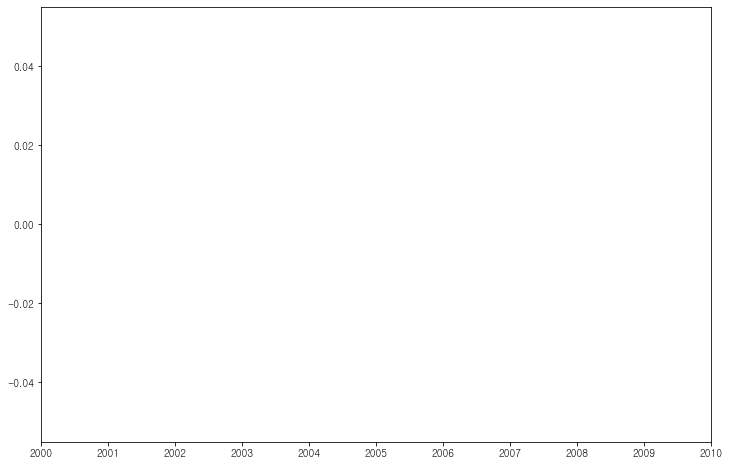

In [82]:
plt.figure(figsize=(12,8))
sns.lineplot(x=dataset_1.index, y=dataset_1.MELT_TEMP, data=dataset_1)
plt.show()

In [83]:
time_steps = 24

X = dataset_1.drop('TAG',axis=1)  
Y = dataset_1[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [86]:
train = X_train.copy()
train['TAG'] = y_train['TAG']

test = X_test.copy()
test['TAG'] = y_test['TAG']

print(dataset_1.shape, train.shape, test.shape)

(835200, 5) (626400, 5) (208800, 5)


In [87]:
train

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,
2020-03-09 09:16:00,381,218,433,3.19,1
2020-04-07 09:13:00,466,177,495,3.19,1
2020-03-15 20:12:00,497,136,189,3.19,1
2020-04-29 03:19:00,749,1746,391,3.21,1
2020-04-03 12:34:00,405,205,255,3.19,0
...,...,...,...,...,...
2020-04-07 02:46:00,407,204,479,3.19,1
2020-04-27 23:22:00,768,1733,543,3.21,1
2020-04-05 16:52:00,786,1737,368,3.22,1


In [88]:
test

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,
2020-03-23 01:05:00,488,156,1183,3.19,1
2020-04-08 04:30:00,499,155,281,3.19,1
2020-03-25 19:03:00,454,174,644,3.19,0
2020-04-30 15:59:00,771,1751,1,3.21,1
2020-04-04 23:37:00,498,211,273,3.19,1
...,...,...,...,...,...
2020-03-10 05:16:00,480,128,204,3.19,1
2020-04-27 05:17:00,777,1752,521,3.21,1
2020-04-25 08:57:00,453,0,9,3.19,1


In [146]:
dataset_1

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,
2020-03-04 00:00:00,0.345420,0.064302,0.011420,0.333333,1.0
2020-03-04 00:00:00,0.238550,0.043237,0.011022,0.333333,1.0
2020-03-04 00:00:00,0.297710,0.085366,0.011004,0.333333,1.0
2020-03-04 00:00:00,0.135496,0.117517,0.010968,0.333333,1.0
2020-03-04 00:00:00,0.935115,0.962306,0.010932,0.666667,1.0
...,...,...,...,...,...
2020-04-30 23:59:00,0.853053,0.966186,0.005755,0.666667,1.0
2020-04-30 23:59:00,0.146947,0.114191,0.005737,0.333333,1.0
2020-04-30 23:59:00,0.299618,0.082040,0.005719,0.500000,1.0


In [147]:
training_data_len = math.ceil(len(df) * 0.75) # taking 90% of data to train and 10% of data to test
testing_data_len = len(df) - training_data_len

time_steps = 24
train, test = df.iloc[0:training_data_len], df.iloc[(training_data_len-time_steps):len(df)]
print(df.shape, train.shape, test.shape)

(835200, 5) (626400, 5) (208824, 5)


In [148]:
train_trans = train[['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']].to_numpy()
test_trans = test[['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']].to_numpy()

# scaler = RobustScaler() # Handles outliers
# train.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=scaler.fit_transform(train_trans)
# test.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=scaler.fit_transform(test_trans)

#Scale the all of the data from columns ['cnt']
# train['TAG'] = scaler.fit_transform(train[['cnt']])
# test['TAG'] = scaler.fit_transform(test[['cnt']])

In [149]:
from tqdm import tqdm_notebook as tqdm

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in tqdm(range(len(train) - time_steps)):
    x_train.append(train.drop(columns='TAG').iloc[i:i + time_steps].to_numpy())
    y_train.append(train.loc[:,'TAG'].iloc[i + time_steps])

#Convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

C:\Users\islab\AppData\Local\Temp\ipykernel_6500\3722837275.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(train) - time_steps)):


  0%|          | 0/626376 [00:00<?, ?it/s]

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000018282AFDF70>
Traceback (most recent call last):
  File "C:\Users\islab\anaconda3\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
#Create the x_test and y_test data sets
x_test = []
y_test = df.loc[:,'TAG'].iloc[training_data_len:len(df)]

for i in tqdm(range(len(test) - time_steps)):
    x_test.append(test.drop(columns='TAG').iloc[i:i + time_steps].to_numpy())
    # y_test.append(test.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_test and y_test to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print('Train size:')
print(x_train.shape, y_train.shape)
print('Test size:')
print(x_test.shape, y_test.shape)

In [100]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM , Bidirectional 

model = Sequential()
# model.add(Bidirectional(LSTM(50,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(Bidirectional(LSTM(50,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam",loss="mse")

# prepared_model = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=[X_test,y_test])

history = model.fit(x_train, y_train, epochs=50, batch_size=24, validation_split=0.1, shuffle=True)

Epoch 1/50
23490/23490 [==============================] - 139s 6ms/step - loss: 0.1924 - val_loss: 0.1561
Epoch 2/50
23490/23490 [==============================] - 141s 6ms/step - loss: 0.1882 - val_loss: 0.1357
Epoch 3/50
23490/23490 [==============================] - 147s 6ms/step - loss: 0.1899 - val_loss: 0.1349
Epoch 4/50
23490/23490 [==============================] - 149s 6ms/step - loss: 0.1896 - val_loss: 0.1379
Epoch 5/50
23490/23490 [==============================] - 151s 6ms/step - loss: 0.1897 - val_loss: 0.1178
Epoch 6/50
23490/23490 [==============================] - 151s 6ms/step - loss: 0.1893 - val_loss: 0.1192
Epoch 7/50
23490/23490 [==============================] - 151s 6ms/step - loss: 0.1891 - val_loss: 0.1236
Epoch 8/50
23490/23490 [==============================] - 151s 6ms/step - loss: 0.1890 - val_loss: 0.1329
Epoch 9/50
23490/23490 [==============================] - 151s 6ms/step - loss: 0.1887 - val_loss: 0.1464
Epoch 10/50
23490/23490 [=====================

In [101]:
y_pred = model.predict(x_test)
# y_pred = scaler.inverse_transform(y_pred)#Undo scaling
y_pred

6525/6525 [==============================] - 16s 2ms/step


array([[0.61871207],
       [0.51802045],
       [0.7110423 ],
       ...,
       [0.7910578 ],
       [0.5522628 ],
       [0.7258369 ]], dtype=float32)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_lstm

0.3366421461358897

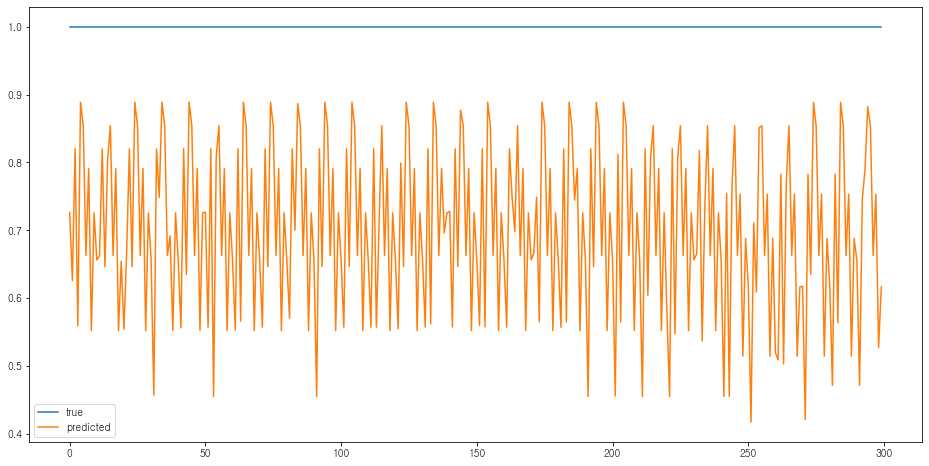

In [103]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[1200:1500], label='true')
plt.plot(y_pred[1200:1500], label='predicted')
plt.legend()

Text(0, 0.5, 'mse score')

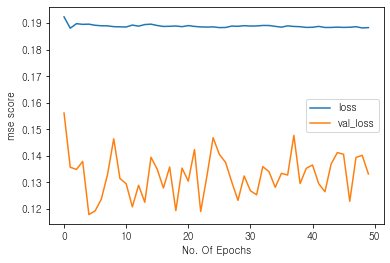

In [104]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

In [106]:
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]),
              activation='tanh', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [109]:
model.compile(optimizer="adam",loss="mse", metrics=['accuracy'])

# prepared_model = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=[X_test,y_test])

history = model.fit(x_train, y_train, epochs=50, batch_size=24, validation_split=0.1, shuffle=True)

Epoch 1/50
23490/23490 [==============================] - 134s 6ms/step - loss: 0.1900 - accuracy: 0.7131 - val_loss: 0.1332 - val_accuracy: 0.8552
Epoch 2/50
23490/23490 [==============================] - 131s 6ms/step - loss: 0.1874 - accuracy: 0.7131 - val_loss: 0.1387 - val_accuracy: 0.8414
Epoch 3/50
23490/23490 [==============================] - 130s 6ms/step - loss: 0.1866 - accuracy: 0.7143 - val_loss: 0.1339 - val_accuracy: 0.8585
Epoch 4/50
23490/23490 [==============================] - 130s 6ms/step - loss: 0.1870 - accuracy: 0.7137 - val_loss: 0.1323 - val_accuracy: 0.8564
Epoch 5/50
23490/23490 [==============================] - 129s 6ms/step - loss: 0.1867 - accuracy: 0.7136 - val_loss: 0.1295 - val_accuracy: 0.8585
Epoch 6/50
23490/23490 [==============================] - 131s 6ms/step - loss: 0.1863 - accuracy: 0.7138 - val_loss: 0.1292 - val_accuracy: 0.8596
Epoch 7/50
23490/23490 [==============================] - 131s 6ms/step - loss: 0.1861 - accuracy: 0.7141 - val_

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
# prepared_model = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=[X_test,y_test])

history = model.fit(x_train, y_train, epochs=50, batch_size=24, validation_split=0.1, callback=early_stop)

In [107]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
model_path = path

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, ' tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', varbose=0, save_best_only=True, mode='auto')

NameError: name 'path' is not defined

In [110]:
pred = model.predict(x_test)

6525/6525 [==============================] - 16s 2ms/step


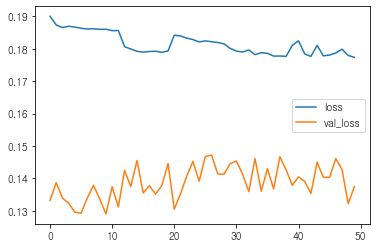

In [113]:
# plt.plot(history,history['loss'], label = 'train')
# plt.plot(history,history['val_loss'], label = 'validation')
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [114]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [116]:
pred_df['TAG'].value_counts()

1    196452
0     12348
Name: TAG, dtype: int64

In [117]:
confusion = confusion_matrix(y_test, pred_df)
print(confusion)

[[     0      0]
 [ 12348 196452]]


### pre prossing

In [137]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
dataset_1[dataset_1.columns] = MMS.fit_transform(dataset_1)

In [138]:
dataset_1.shape

(835200, 5)

In [139]:
training_size = round(len(dataset_1) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

668160

In [140]:
train_data = dataset_1[:training_size]
test_data  = dataset_1[training_size:]

train_data.shape, test_data.shape

((668160, 5), (167040, 5))

In [141]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [143]:
start_time = time.time()

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

print('수행 시간: {:.1f}초'.format(time.time() - start_time))

수행 시간: 150.7초


In [144]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((668110, 50, 5), (668110, 5), (166990, 50, 5), (166990, 5))

In [145]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_seq, train_label, epochs=20,validation_data=(test_seq, test_label), verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            11200     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 31,502
Trainable params: 31,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


ValueError: in user code:

    File "C:\Users\islab\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\islab\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\islab\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\islab\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\islab\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\islab\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\islab\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\islab\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\islab\anaconda3\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\islab\anaconda3\lib\site-packages\keras\backend.py", line 5685, in binary_crossentropy
        bce = target * tf.math.log(output + epsilon())

    ValueError: Dimensions must be equal, but are 5 and 2 for '{{node binary_crossentropy/mul}} = Mul[T=DT_FLOAT](IteratorGetNext:1, binary_crossentropy/Log)' with input shapes: [?,5], [?,2].


In [255]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
dataset

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [155]:
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [166]:
dataset_1

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 00:00:00,0,489,116,631,3.19,OK
1,2020-03-04 00:00:00,1,433,78,609,3.19,OK
2,2020-03-04 00:00:00,2,464,154,608,3.19,OK
3,2020-03-04 00:00:00,3,379,212,606,3.19,OK
4,2020-03-04 00:00:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59:00,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59:00,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59:00,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59:00,835198,467,0,314,3.19,OK


In [167]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [168]:
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']

In [169]:
encoder = preprocessing.LabelEncoder()
dataset_1['TAG'] = encoder.fit_transform(df['TAG'])
dataset_1['TAG'] = dataset_1['TAG'].astype('float32')

In [170]:
dataset_2 = dataset_1[['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']]
dataset_2

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,1.0
1,433,78,609,3.19,1.0
2,464,154,608,3.19,1.0
3,379,212,606,3.19,1.0
4,798,1736,604,3.21,1.0
...,...,...,...,...,...
835195,755,1743,318,3.21,1.0
835196,385,206,317,3.19,1.0
835197,465,148,316,3.20,1.0
835198,467,0,314,3.19,1.0


In [171]:
split_date = int(dataset_2.shape[0]*0.7)

In [172]:
train = dataset_2[:split_date]
test = dataset_2[split_date:]

In [173]:
print(train.shape)
print(test.shape)

(584640, 5)
(250560, 5)


In [174]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [175]:
x_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [176]:
smote = SMOTE(random_state = 1)

X_train_over, y_train_over = smote.fit_resample(x_train_values, y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', x_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (584640, 4) (584640,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 (821032, 4) (821032,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    410516
0.0    410516
dtype: int64


In [177]:
len(X_train_over)

821032

In [178]:
X_train_over = pd.DataFrame(X_train_over, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP'])
y_train_over = pd.DataFrame(y_train_over, columns = ['TAG'])

In [265]:
X_train_over

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,0.345420,0.064302,0.011420,0.333333
1,0.238550,0.043237,0.011022,0.333333
2,0.297710,0.085366,0.011004,0.333333
3,0.135496,0.117517,0.010968,0.333333
4,0.935115,0.962306,0.010932,0.666667
...,...,...,...,...
821027,0.187023,0.114745,0.005110,0.166667
821028,0.223282,0.122506,0.009400,0.166667
821029,0.083969,0.109756,0.001495,0.166667
821030,0.206107,0.120165,0.003398,0.166667


In [179]:
#train dataset
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [270]:
test_sc = pd.DataFrame(test_sc, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG'])

In [271]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']
label_cols = ['TAG']

In [272]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((250550, 10, 4), (250550, 1))

In [273]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.3)
x_train.shape, x_valid.shape

((574715, 10, 4), (246307, 10, 4))

In [274]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [272]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [273]:
model_path = path

In [274]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [275]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
57472/57472 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8049
Epoch 1: val_loss improved from inf to 0.34125, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 273s 5ms/step - loss: 0.3498 - accuracy: 0.8049 - val_loss: 0.3413 - val_accuracy: 0.8125
Epoch 2/200
57463/57472 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8115
Epoch 2: val_loss improved from 0.34125 to 0.33897, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 268s 5ms/step - loss: 0.3395 - accuracy: 0.8115 - val_loss: 0.3390 - val_accuracy: 0.8081
Epoch 3/200
57462/57472 [============================>.] - ETA: 0s - loss: 0.3376 - accuracy: 0.8129
Epoch 3: val_loss did not improve from 0.33897
57472/57472 [==============================] - 270s 5ms/step - loss: 0.3376 - accuracy: 0.8129 - val_loss: 0.3395 - val_accuracy: 

In [276]:
model.load_weights(filename)

pred = model.predict(test_feature)

7830/7830 [==============================] - 14s 2ms/step


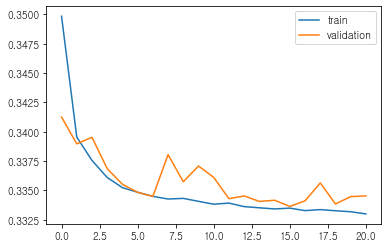

In [277]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [278]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [279]:
pred_df['TAG'].value_counts()

1    175636
0     74914
Name: TAG, dtype: int64

In [280]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[  2155    785]
 [ 72759 174851]]


In [281]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9955
recall : 0.7062
f1-score : 0.8262
accuracy : 0.7065


# <font color = F299B1>사후확률

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import *

# csv = 데이터프레임 이름
# num_row = 데이터프레임 row 수
# target = y label 이름
def labeling(csv, num_row, target): # 각 라벨링 값마다 한 쎌으로 나뉘어 져 있던거 하나로 합침
#     df = pd.read_csv(csv, index_col=0)
    # 데이터 프레임의 row갯수 100개씩 나누어 사후확률 진행
    ### 1, 0 ~ 99 ⇒ test set, 100 ~ 682 ⇒ training set
    ### 2. 100 ~ 682 Random Forest
    ### 3. 0 ~ 99 사후확률 계산
    ### 4. 5번 반복
    ### 5. 사후확률 평균 계산

    if (num_row % 100) == 0: # row 개수 100으로 나누어 몇 번 실행할건지 정함
        row_iter = (num_row // 20000)
    else:
        row_iter = (num_row // 20000)
        row_iter += 1
    
#     predict_proba_list = []
    iter_list = []
    tmp_add = []
    for i in range(row_iter):
        iter_list.append(i+1)
    
    for i in range(len(iter_list)):
        print()
        print('===^ iteration ^=== : ', i+1)
        if (i+1) == iter_list[0]: # 1 ~ 100 라벨링 ⇒ test set
            test = csv.iloc[0:20000]
            X_test = test.drop(target,axis=1)  
            y_test = test[target]
            
            train = csv.iloc[20000:]
            X_train = train.drop(target,axis=1)  
            y_train = train[target]
            
            globals()['X_test_{}'.format(iter_list[i])] = test.drop(target,axis=1) 
            for j in range((iter_list[i]*5)-5, (iter_list[i]*5)): # random state 다르게 해서 5번 수행
                rfc = RandomForestClassifier(n_estimators=200, oob_score=True, 
                                        criterion='entropy', min_samples_leaf=20000, random_state=j)
                rfc.fit(X_train, y_train)
                rf_p = rfc.predict_proba(X_test) # 사후확룰
#                 print('random state : ', j)
                globals()['X_test_{}'.format(iter_list[i])]['proba_{num}=1'.format(num=j)] = rf_p[:,1] # 사후확룰 데이터셋에 추가
                globals()['pred_proba_{num}'.format(num = j)] = rf_p[:,1] # 사후확률 리스트에 추가
            # 5번 구한 사후확률 다 더해줌
            tmp_add = globals()['pred_proba_{}'.format((iter_list[i]*5)-5)] +  globals()['pred_proba_{}'.format((iter_list[i]*5)-4)] +  globals()['pred_proba_{}'.format((iter_list[i]*5)-3)] +  globals()['pred_proba_{}'.format((iter_list[i]*5)-2)]+ globals()['pred_proba_{}'.format((iter_list[i]*5)-1)]
#                 globals()['add_{}'.format(iter_list[i])]
            
            globals()['avg_{}'.format(iter_list[i])] = []
            for j in range(len(tmp_add)): # 5번 구한 사후확률의 평균 구함
                sub = tmp_add[j] / 5
                globals()['avg_{}'.format(iter_list[i])].append(sub)
                
        elif (i+1) == iter_list[-1]: # 마지막 row 100개 사후확률
            last_row = num_row - 20000
#             last_row = num_row - (num_row % 100)
            test = csv.iloc[last_row:]
            X_test = test.drop(target,axis=1)  
            y_test = test[target]
            
            train = csv.iloc[:last_row]
            X_train = train.drop(target,axis=1)  
            y_train = train[target]
            
            globals()['X_test_{}'.format(iter_list[i])] = test.drop(target,axis=1) 
            for j in range((iter_list[i]*5)-5, (iter_list[i]*5)): # random state 다르게 해서 5번 수행
                rfc = RandomForestClassifier(n_estimators=200, oob_score=True, 
                                        criterion='entropy', min_samples_leaf=20000, random_state=j)
                rfc.fit(X_train, y_train)
                rf_p = rfc.predict_proba(X_test) # 사후확룰
#                 print('random state : ', j)
                globals()['X_test_{}'.format(iter_list[i])]['proba_{num}=1'.format(num=j)] = rf_p[:,1] # 사후확룰 데이터셋에 추가
                globals()['pred_proba_{num}'.format(num = j)] = rf_p[:,1] # 사후확률 리스트에 추가
            # 5번 구한 사후확률 다 더해줌
            tmp_add = globals()['pred_proba_{}'.format((iter_list[i]*5)-5)] +  globals()['pred_proba_{}'.format((iter_list[i]*5)-4)] +  globals()['pred_proba_{}'.format((iter_list[i]*5)-3)] +  globals()['pred_proba_{}'.format((iter_list[i]*5)-2)]+ globals()['pred_proba_{}'.format((iter_list[i]*5)-1)]
            
            globals()['avg_{}'.format(iter_list[i])] = []
            for j in range(len(tmp_add)): # 5번 구한 사후확률의 평균 구함
                sub = tmp_add[j] / 5
                globals()['avg_{}'.format(iter_list[i])].append(sub)
            cut_row = ((i+1) * 100) - num_row
            globals()['avg_{}'.format(iter_list[i])] = globals()['avg_{}'.format(iter_list[i])][cut_row:]
            # row가 100으로 나누어 떨어지지 않으면 전체 row 수에 맞게 잘라줘야 함
            
        else: # 처음 100개와 마지막 100개를 뺀 데이터셋 사후확룰 구함
            start_row = i * 20000
            end_row = start_row + 20000
            test = csv.iloc[start_row : end_row]
            X_test = test.drop(target,axis=1)  
            y_test = test[target]
            
            train1 = csv.iloc[:start_row]
            train2 = csv.iloc[end_row:]

            train = pd.concat([train1,train2])
            X_train = train.drop(target,axis=1)  
            y_train = train[target]
            
            globals()['X_test_{}'.format(iter_list[i])] = test.drop(target,axis=1) 
            for j in range((iter_list[i]*5)-5, (iter_list[i]*5)): # random state 다르게 해서 5번 수행
                rfc = RandomForestClassifier(n_estimators=200, oob_score=True, 
                                        criterion='entropy', min_samples_leaf=20000, random_state=j)
                rfc.fit(X_train, y_train)
                rf_p = rfc.predict_proba(X_test)
#                 print('random state : ', j)
                globals()['X_test_{}'.format(iter_list[i])]['proba_{num}=1'.format(num=j)] = rf_p[:,1] # 사후확룰 데이터셋에 추가
                globals()['pred_proba_{num}'.format(num = j)] = rf_p[:,1] # 사후확률 리스트에 추가
            # 5번 구한 사후확률 다 더해줌
            tmp_add = globals()['pred_proba_{}'.format((iter_list[i]*5)-5)] +  globals()['pred_proba_{}'.format((iter_list[i]*5)-4)] +  globals()['pred_proba_{}'.format((iter_list[i]*5)-3)] +  globals()['pred_proba_{}'.format((iter_list[i]*5)-2)]+ globals()['pred_proba_{}'.format((iter_list[i]*5)-1)]
            
            globals()['avg_{}'.format(iter_list[i])] = []
            for j in range(len(tmp_add)): # 5번 구한 사후확률의 평균 구함
                sub = tmp_add[j] / 5
                globals()['avg_{}'.format(iter_list[i])].append(sub)
    print()
    print('╔═════════*.·:·.☽✧    ✦    ✧☾.·:·.*═════════╗')
    print('   모든 사후확률 predict_proba_avg에 저장 완료!')
    print('╚═════════*.·:·.☽✧    ✦    ✧☾.·:·.*═════════╝')
    # 마지막에 평균 구한 사후확률들 한 리스트에 넣어줘야되는데 이건,,,함수 밖에서,,
    # 익어 햇다.
    
    
    ### 
    
    predict_proba_avg = []
    for i in range(len(iter_list)):
        for j in globals()['avg_{}'.format(iter_list[i])]:
            predict_proba_avg.append(j)
            
    return predict_proba_avg
#     predict_proba_total = []
#     for i in range(len(iter_list)):
#         predict_proba_total.append(globals()['avg_{}'.format(iter_list[i])][i])
#     return predict_proba_total

In [283]:
df

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,1
1,433,78,609,3.19,1
2,464,154,608,3.19,1
3,379,212,606,3.19,1
4,798,1736,604,3.21,1
...,...,...,...,...,...
835195,755,1743,318,3.21,1
835196,385,206,317,3.19,1
835197,465,148,316,3.20,1
835198,467,0,314,3.19,1


In [288]:
predict_proba_avg = labeling(df, 835200, 'TAG')


===^ iteration ^=== :  1

===^ iteration ^=== :  2

===^ iteration ^=== :  3

===^ iteration ^=== :  4

===^ iteration ^=== :  5

===^ iteration ^=== :  6

===^ iteration ^=== :  7

===^ iteration ^=== :  8

===^ iteration ^=== :  9

===^ iteration ^=== :  10

===^ iteration ^=== :  11

===^ iteration ^=== :  12

===^ iteration ^=== :  13

===^ iteration ^=== :  14

===^ iteration ^=== :  15

===^ iteration ^=== :  16

===^ iteration ^=== :  17

===^ iteration ^=== :  18

===^ iteration ^=== :  19

===^ iteration ^=== :  20

===^ iteration ^=== :  21

===^ iteration ^=== :  22

===^ iteration ^=== :  23

===^ iteration ^=== :  24

===^ iteration ^=== :  25

===^ iteration ^=== :  26

===^ iteration ^=== :  27

===^ iteration ^=== :  28

===^ iteration ^=== :  29

===^ iteration ^=== :  30

===^ iteration ^=== :  31

===^ iteration ^=== :  32

===^ iteration ^=== :  33

===^ iteration ^=== :  34

===^ iteration ^=== :  35

===^ iteration ^=== :  36

===^ iteration ^=== :  37

===^ iter

In [286]:
predict_proba_avg

[0.8563250203664641,
 0.44940662540131093,
 0.583382989969824,
 0.556919107911088,
 0.9999976722170837,
 0.9999871313253372,
 0.5571399818674067,
 0.8658737550530734,
 0.45238671876727443,
 0.8622993584934268,
 0.8720545058331091,
 0.488357273234849,
 0.8698874616309112,
 0.5666445372565301,
 0.9999927712850374,
 1.0,
 0.5154591603038071,
 0.5084343451753807,
 0.44579254710498545,
 0.8737013648298276,
 0.8708572490799324,
 0.4465884546996649,
 0.8656213910842435,
 0.571759520679693,
 0.9999927712850374,
 0.9999894591082535,
 0.5685343780784571,
 0.8718134471978954,
 0.45935459316582145,
 0.47162525154912044,
 0.46620633180030346,
 0.4455657740822011,
 0.47678866688741933,
 0.5719905484212449,
 0.9999871313253372,
 1.0,
 0.5726615807675597,
 0.846730944887326,
 0.44740575550603595,
 0.49294168660283216,
 0.4767382729108928,
 0.4461393741212162,
 0.5313900006988362,
 0.5744946557791744,
 1.0,
 0.9999976722170837,
 0.5664120695435345,
 0.5107367611126324,
 0.4616046292005122,
 0.862574042

In [289]:
predict_proba_avg

[0.897467660033565,
 0.5517282966196674,
 0.6865356274896451,
 0.6497651628316556,
 0.9999985119770601,
 0.9999979890152895,
 0.650158049641989,
 0.8974610664285484,
 0.5570250966306547,
 0.8973806661283892,
 0.8998794872776031,
 0.5900931647371321,
 0.8980682965941418,
 0.6537302832499685,
 0.9999999691719588,
 1.0,
 0.6152156012201727,
 0.6294882781147267,
 0.548502101687999,
 0.9002169060882459,
 0.8983645418835604,
 0.5484430150565485,
 0.8978603470419987,
 0.653434579869215,
 0.9999999691719588,
 0.9999907767665241,
 0.6544581381947749,
 0.8983413596842867,
 0.5636726976475659,
 0.5801804071749739,
 0.5800147879741585,
 0.5496634175825748,
 0.5934107442796324,
 0.6547922324520201,
 0.9999887657818135,
 1.0,
 0.6547731690384415,
 0.876974201750705,
 0.5508485819618827,
 0.6091716502180942,
 0.5934845894097567,
 0.5508288969914308,
 0.6364418709120666,
 0.6580578106598396,
 1.0,
 0.9999985119770601,
 0.6561115223701679,
 0.6314878522580644,
 0.5702281316140152,
 0.8915110131272763,


In [291]:
len(predict_proba_avg)

820000

In [307]:
test = df.iloc[820000:]
test

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
820000,502,107,409,3.19,1
820001,444,0,407,3.19,1
820002,511,167,406,3.19,1
820003,386,217,405,3.18,1
820004,739,1729,403,3.22,1
...,...,...,...,...,...
835195,755,1743,318,3.21,1
835196,385,206,317,3.19,1
835197,465,148,316,3.20,1
835198,467,0,314,3.19,1


In [308]:
X_test = test.drop('TAG',axis=1)  
y_test = test['TAG']

In [315]:
X_test

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
820000,502,107,409,3.19
820001,444,0,407,3.19
820002,511,167,406,3.19
820003,386,217,405,3.18
820004,739,1729,403,3.22
...,...,...,...,...
835195,755,1743,318,3.21
835196,385,206,317,3.19
835197,465,148,316,3.20
835198,467,0,314,3.19


In [294]:
train = df.iloc[:820000]
train

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,1
1,433,78,609,3.19,1
2,464,154,608,3.19,1
3,379,212,606,3.19,1
4,798,1736,604,3.21,1
...,...,...,...,...,...
819995,760,1732,421,3.22,1
819996,362,218,419,3.19,1
819997,481,171,415,3.19,1
819998,445,87,414,3.19,1


In [305]:
X_train = train.drop('TAG',axis=1)  
y_train = train['TAG']

In [314]:
X_train

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,489,116,631,3.19
1,433,78,609,3.19
2,464,154,608,3.19
3,379,212,606,3.19
4,798,1736,604,3.21
...,...,...,...,...
819995,760,1732,421,3.22
819996,362,218,419,3.19
819997,481,171,415,3.19
819998,445,87,414,3.19


In [312]:
X_test_1

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
820000,502,107,409,3.19
820001,444,0,407,3.19
820002,511,167,406,3.19
820003,386,217,405,3.18
820004,739,1729,403,3.22
...,...,...,...,...
835195,755,1743,318,3.21
835196,385,206,317,3.19
835197,465,148,316,3.20
835198,467,0,314,3.19


In [316]:
X_test_1 = test.drop('TAG',axis=1) 
for i in range(205, 210):
    rfc = RandomForestClassifier(n_estimators=200, oob_score=True, 
                                criterion='entropy', min_samples_leaf=20000, random_state=i)
    rfc.fit(X_train, y_train)
    rf_p = rfc.predict_proba(X_test)
    print('random state : ', i)
    X_test_1['proba_{num}=1'.format(num=i)] = rf_p[:,1]
        
# rf_y_pred_7 = []
# for i in range(583):
#     rf_y_pred_7.append(rf_y[i])  

random state :  205
random state :  206
random state :  207
random state :  208
random state :  209


In [301]:
rf_y

[0.9051349366105882,
 0.5538154058142575,
 0.9246057829613936,
 0.6715447781251735,
 1.0,
 1.0,
 0.6691415814232091,
 0.9207136280524364,
 0.6149538353387551,
 0.9240398981418081,
 0.9244451007320228,
 0.5702137123067252,
 0.6335847024384971,
 0.6726029788979256,
 0.9999996931722623,
 1.0,
 0.6074858133617628,
 0.9247835771064775,
 0.5933118025286055,
 0.9136156927059226,
 0.9250311576394207,
 0.5899277521676491,
 0.9201633945431085,
 0.6723598565434026,
 1.0,
 1.0,
 0.6658632116503267,
 0.9248472590395319,
 0.8320281595309456,
 0.9172277439335548,
 0.9236416054545233,
 0.8220890350712032,
 0.9005010468512136,
 0.6701390143451406,
 0.9999922326987187,
 0.9999978497382088,
 0.6741035819154562,
 0.6184950738094206,
 0.5594689223278801,
 0.918455316650484,
 0.9231645329698205,
 0.5527496822674861,
 0.6329848578764417,
 0.6744252420415714,
 0.9999996869463242,
 0.9999937650853825,
 0.6732265679430437,
 0.6236668651335591,
 0.8008344931953357,
 0.923952736024125,
 0.9186393807900977,
 0.561

In [317]:
X_test_1

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,proba_205=1,proba_206=1,proba_207=1,proba_208=1,proba_209=1
820000,502,107,409,3.19,0.900666,0.901563,0.906407,0.903767,0.903016
820001,444,0,407,3.19,0.553453,0.552236,0.552882,0.552923,0.553300
820002,511,167,406,3.19,0.924101,0.923894,0.923743,0.925156,0.924208
820003,386,217,405,3.18,0.673134,0.672570,0.672712,0.672626,0.671715
820004,739,1729,403,3.22,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
835195,755,1743,318,3.21,0.999999,1.000000,1.000000,0.999999,1.000000
835196,385,206,317,3.19,0.675549,0.675362,0.675321,0.674645,0.674110
835197,465,148,316,3.20,0.872388,0.863718,0.863546,0.860850,0.871253
835198,467,0,314,3.19,0.837848,0.843049,0.835733,0.839993,0.834912


In [318]:
pred_proba_205 = X_test_1['proba_205=1'].values.tolist()
pred_proba_206 = X_test_1['proba_206=1'].values.tolist()
pred_proba_207 = X_test_1['proba_207=1'].values.tolist()
pred_proba_208 = X_test_1['proba_208=1'].values.tolist()
pred_proba_209 = X_test_1['proba_209=1'].values.tolist()

In [319]:
add = [a+b+c+d+e for a,b,c,d,e 
               in zip(pred_proba_205, pred_proba_206, pred_proba_207, pred_proba_208, pred_proba_209)]  

In [320]:
avg = []
for i in range(len(add)):
    sub = add[i]/5
    avg.append(sub)
print(avg)

[0.9030839435290966, 0.5529588212592075, 0.9242202797664728, 0.6725513820188268, 1.0, 1.0, 0.6705301873524343, 0.921207234333506, 0.6078734275139975, 0.9238667026989417, 0.9244364040012638, 0.5699214936848769, 0.631917729026104, 0.6730434533647542, 0.9999996908756492, 1.0, 0.6078051034420027, 0.9247451026567537, 0.5877340894884718, 0.9139882656225213, 0.925371921222294, 0.5858895287033608, 0.9215406816225974, 0.6735900638454726, 1.0, 1.0, 0.6684989832621897, 0.9252139641797127, 0.8526401877157092, 0.9169435370864261, 0.9238598344263169, 0.837854595594117, 0.9032671632870267, 0.6709717833258259, 0.999991829863587, 0.9999982656519538, 0.6742722001662492, 0.6186286565027895, 0.5587985940521998, 0.9185087376124832, 0.9232818677848215, 0.5522502452922678, 0.6303509504855436, 0.6744970630165141, 0.9999995296714665, 0.9999934383225414, 0.6740905985905379, 0.6199726904315009, 0.816633451221046, 0.9242951953008045, 0.918563402999073, 0.56120460858158, 0.9258468010958637, 0.6735824549942933, 1.0

In [321]:
len(avg)

15200

In [322]:
for i in avg:
    predict_proba_avg.append(i)
    
print(len(predict_proba_avg))

835200


In [323]:
df

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,1
1,433,78,609,3.19,1
2,464,154,608,3.19,1
3,379,212,606,3.19,1
4,798,1736,604,3.21,1
...,...,...,...,...,...
835195,755,1743,318,3.21,1
835196,385,206,317,3.19,1
835197,465,148,316,3.20,1
835198,467,0,314,3.19,1


# <font color = F299B1>ACCURACY

In [ ]:
tmp_pred = predict_proba_avgp_pred.append(predict_proba_avg)
tmp_pred = list(map(lambda x: 1 if x>=0.5 else 0, tmp_pred))
acc = accuracy_score(df['TAG'], tmp_pred)
print('accuracy : %0.4f' %acc)

In [324]:
df_accuracy = df.copy()
df_accuracy`

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,1
1,433,78,609,3.19,1
2,464,154,608,3.19,1
3,379,212,606,3.19,1
4,798,1736,604,3.21,1
...,...,...,...,...,...
835195,755,1743,318,3.21,1
835196,385,206,317,3.19,1
835197,465,148,316,3.20,1
835198,467,0,314,3.19,1


In [326]:
df_accuracy = df_accuracy.drop('TAG', axis=1)
df_accuracy['y_proba'] = predict_proba_avg
df_accuracy

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,y_proba
0,489,116,631,3.19,0.897468
1,433,78,609,3.19,0.551728
2,464,154,608,3.19,0.686536
3,379,212,606,3.19,0.649765
4,798,1736,604,3.21,0.999999
...,...,...,...,...,...
835195,755,1743,318,3.21,1.000000
835196,385,206,317,3.19,0.674997
835197,465,148,316,3.20,0.866351
835198,467,0,314,3.19,0.838307


In [327]:
from sklearn.model_selection import train_test_split

X = df_accuracy.drop('y_proba',axis=1)  
Y = df_accuracy[['y_proba']]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [328]:
from sklearn.model_selection import train_test_split

X_1 = df.drop('TAG',axis=1)  
Y_1 = df[['TAG']]


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=1)

C:\Users\islab\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


min sample :  10000
precision : 0.78798
recall : 1.00000
f1-score : 0.88142
accuracy : 0.78798
0.7879849137931034
[[     0  35415]
 [     0 131625]]



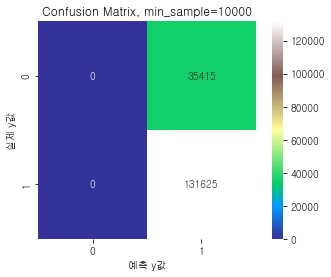

C:\Users\islab\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


min sample :  15000
precision : 0.78798
recall : 1.00000
f1-score : 0.88142
accuracy : 0.78798
0.7879849137931034
[[     0  35415]
 [     0 131625]]



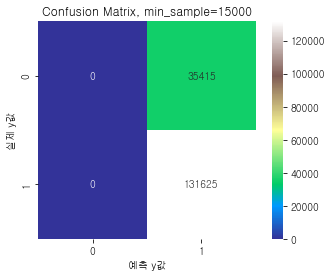

C:\Users\islab\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


min sample :  20000
precision : 0.78798
recall : 1.00000
f1-score : 0.88142
accuracy : 0.78798
0.7879849137931034
[[     0  35415]
 [     0 131625]]



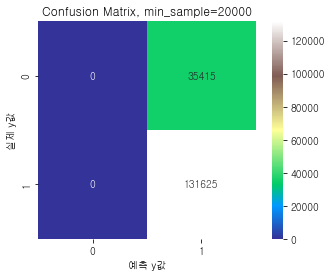

C:\Users\islab\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


min sample :  30000
precision : 0.78798
recall : 1.00000
f1-score : 0.88142
accuracy : 0.78798
0.7879849137931034
[[     0  35415]
 [     0 131625]]



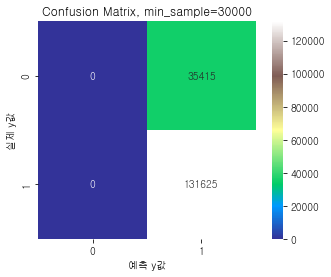

C:\Users\islab\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


min sample :  40000
precision : 0.78798
recall : 1.00000
f1-score : 0.88142
accuracy : 0.78798
0.7879849137931034
[[     0  35415]
 [     0 131625]]



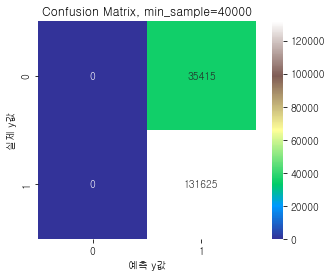

In [331]:
min_sample = [10000, 15000, 20000, 30000, 40000]
for j in min_sample:
    reg_tree = DecisionTreeRegressor(criterion="mse", min_samples_leaf=j, random_state=123)
    reg_tree.fit(X_train, y_train)

    # regression tree에서 score는 accuracy 아님!
    tmp_pred = [] # regression 에서 사후확률 구함, 0.5보다 크거나 같으면 1 작으면 0으로 맵핑
    tmp_pred = reg_tree.predict(X_test).tolist()
    tmp_pred = list(map(lambda x: 1 if x>=0.5 else 0, tmp_pred))

    print('min sample : ', j)
    
    p = precision_score(y_test_1, tmp_pred)
    print('precision : {:.5f}'.format(p))
    r = recall_score(y_test_1, tmp_pred)
    print('recall : {:.5f}'.format(r))
    f1 = f1_score(y_test_1, tmp_pred)
    print('f1-score : {:.5f}'.format(f1))
    acc = accuracy_score(y_test_1, tmp_pred) 
    print('accuracy : {:.5f}'.format(acc))
    print(acc)

    confusion_dt = confusion_matrix(y_test_1, tmp_pred)
    print(confusion_dt)
    print()
    plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
    class_lables=['0','1','2','3']
    plt.title("Confusion Matrix, min_sample={}".format(j), size = 12)
    plot.set_xlabel('예측 y값')
    plot.set_ylabel('실제 y값')
    plt.show()

# <font color = F21638> 딥러닝 사후확률
    인데 F1이 너무 낮아

In [496]:
dataset_1

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,
2020-03-04 00:00:00,0.345420,0.064302,0.011420,0.333333,1.0
2020-03-04 00:00:00,0.238550,0.043237,0.011022,0.333333,1.0
2020-03-04 00:00:00,0.297710,0.085366,0.011004,0.333333,1.0
2020-03-04 00:00:00,0.135496,0.117517,0.010968,0.333333,1.0
2020-03-04 00:00:00,0.935115,0.962306,0.010932,0.666667,1.0
...,...,...,...,...,...
2020-04-30 23:59:00,0.853053,0.966186,0.005755,0.666667,1.0
2020-04-30 23:59:00,0.146947,0.114191,0.005737,0.333333,1.0
2020-04-30 23:59:00,0.299618,0.082040,0.005719,0.500000,1.0


In [489]:
dataset_3 = dataset_1.drop('INSP', axis=1)
dataset_3

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
STD_DT,,,,
2020-03-04 00:00:00,0.345420,0.064302,0.011420,1.0
2020-03-04 00:00:00,0.238550,0.043237,0.011022,1.0
2020-03-04 00:00:00,0.297710,0.085366,0.011004,1.0
2020-03-04 00:00:00,0.135496,0.117517,0.010968,1.0
2020-03-04 00:00:00,0.935115,0.962306,0.010932,1.0
...,...,...,...,...
2020-04-30 23:59:00,0.853053,0.966186,0.005755,1.0
2020-04-30 23:59:00,0.146947,0.114191,0.005737,1.0
2020-04-30 23:59:00,0.299618,0.082040,0.005719,1.0


In [338]:
split_date = int(dataset_3.shape[0]*0.7)

In [339]:
train = dataset_3[:split_date]
test = dataset_3[split_date:]

In [340]:
print(train.shape)
print(test.shape)

(584640, 4)
(250560, 4)


In [341]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [342]:
x_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [343]:
smote = SMOTE(random_state = 1)

X_train_over, y_train_over = smote.fit_resample(x_train_values, y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', x_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (584640, 3) (584640,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 (821032, 3) (821032,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    410516
0.0    410516
dtype: int64


In [344]:
len(X_train_over)

821032

In [345]:
X_train_over = pd.DataFrame(X_train_over, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT'])
y_train_over = pd.DataFrame(y_train_over, columns = ['TAG'])

In [346]:
X_train_over

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT
0,0.345420,0.064302,0.011420
1,0.238550,0.043237,0.011022
2,0.297710,0.085366,0.011004
3,0.135496,0.117517,0.010968
4,0.935115,0.962306,0.010932
...,...,...,...
821027,0.187023,0.114745,0.004312
821028,0.223282,0.122336,0.009563
821029,0.083969,0.109756,0.001495
821030,0.206107,0.120165,0.003398


In [347]:
#train dataset
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [348]:
test_sc = pd.DataFrame(test_sc, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'TAG'])

In [349]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT']
label_cols = ['TAG']

In [350]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((250550, 10, 3), (250550, 1))

In [351]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.3)
x_train.shape, x_valid.shape

((574715, 10, 3), (246307, 10, 3))

In [352]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [353]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [354]:
model_path = path

In [355]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [356]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
57470/57472 [============================>.] - ETA: 0s - loss: 0.3507 - accuracy: 0.8045
Epoch 1: val_loss improved from inf to 0.34041, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 290s 5ms/step - loss: 0.3507 - accuracy: 0.8045 - val_loss: 0.3404 - val_accuracy: 0.8132
Epoch 2/200
57469/57472 [============================>.] - ETA: 0s - loss: 0.3401 - accuracy: 0.8113
Epoch 2: val_loss improved from 0.34041 to 0.33914, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 288s 5ms/step - loss: 0.3401 - accuracy: 0.8113 - val_loss: 0.3391 - val_accuracy: 0.8080
Epoch 3/200
57472/57472 [==============================] - ETA: 0s - loss: 0.3381 - accuracy: 0.8124
Epoch 3: val_loss improved from 0.33914 to 0.33758, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
57472/57472 [==============================] - 287s 

In [357]:
model.load_weights(filename)

pred = model.predict(test_feature)

7830/7830 [==============================] - 16s 2ms/step


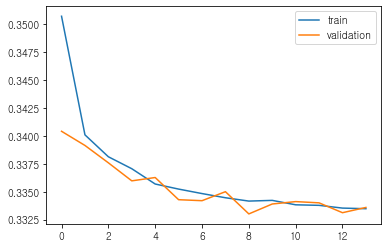

In [358]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [359]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [360]:
pred_df['TAG'].value_counts()

1    176328
0     74222
Name: TAG, dtype: int64

In [361]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[  2161    779]
 [ 72061 175549]]


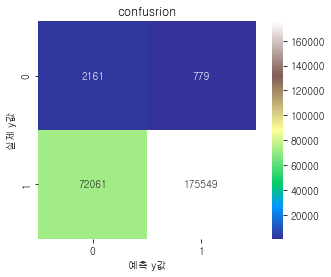

In [364]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [362]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9956
recall : 0.7090
f1-score : 0.8282
accuracy : 0.7093


# <font color = F21638> 딥러닝 F1

###  <font color = F21638> MELT_WEIGHT < 10000 이하인 데이터 셋

In [276]:
dataset.replace({'TAG': {'OK': 1, 'NG': 0}}, inplace=True)
dataset

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1
835198,2020-04-30 23:59,835198,467,0,314,3.19,1


In [277]:
dataset_3 = dataset[dataset['MELT_WEIGHT'] < 10000]
dataset_3

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1
835198,2020-04-30 23:59,835198,467,0,314,3.19,1


In [278]:
dataset_3 = dataset_3[dataset_3['MELT_WEIGHT'] < 10000]
dataset_3

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1
835198,2020-04-30 23:59,835198,467,0,314,3.19,1


### <font color = F21638> MOTORSPEED, MELT_WEIGHT == 0

In [279]:
dataset_3 = dataset_3[dataset_3['MOTORSPEED'] != 0]
dataset_3

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835194,2020-04-30 23:59,835194,749,1740,319,3.21,1
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1


In [280]:
dataset_3 = dataset_3[dataset_3['MELT_WEIGHT'] != 0]
dataset_3

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,1
1,2020-03-04 0:00,1,433,78,609,3.19,1
2,2020-03-04 0:00,2,464,154,608,3.19,1
3,2020-03-04 0:00,3,379,212,606,3.19,1
4,2020-03-04 0:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...,...
835194,2020-04-30 23:59,835194,749,1740,319,3.21,1
835195,2020-04-30 23:59,835195,755,1743,318,3.21,1
835196,2020-04-30 23:59,835196,385,206,317,3.19,1
835197,2020-04-30 23:59,835197,465,148,316,3.20,1


### <font color = F21638> DL

In [281]:
dataset_3['STD_DT'] = dataset_3['STD_DT'].apply(lambda x: pd.to_datetime(str(x), format = '%Y-%m-%d %H:%M:%S'))

C:\Users\islab\AppData\Local\Temp\ipykernel_16868\1295738622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_3['STD_DT'] = dataset_3['STD_DT'].apply(lambda x: pd.to_datetime(str(x), format = '%Y-%m-%d %H:%M:%S'))


In [282]:
dataset_3 = dataset_3.set_index(['STD_DT'])
dataset_3

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,1
2020-03-04 00:00:00,1,433,78,609,3.19,1
2020-03-04 00:00:00,2,464,154,608,3.19,1
2020-03-04 00:00:00,3,379,212,606,3.19,1
2020-03-04 00:00:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...
2020-04-30 23:59:00,835194,749,1740,319,3.21,1
2020-04-30 23:59:00,835195,755,1743,318,3.21,1
2020-04-30 23:59:00,835196,385,206,317,3.19,1


In [384]:
split_date = int(dataset_3.shape[0]*0.7)

In [385]:
train = dataset_3[:split_date]
test = dataset_3[split_date:]

In [386]:
print(train.shape)
print(test.shape)

(561647, 4)
(240706, 4)


In [387]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [388]:
x_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [389]:
smote = SMOTE(random_state = 1)

X_train_over, y_train_over = smote.fit_resample(x_train_values, y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', x_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (561647, 3) (561647,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 (800488, 3) (800488,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    400244
0.0    400244
dtype: int64


In [390]:
len(X_train_over)

800488

In [391]:
X_train_over = pd.DataFrame(X_train_over, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT'])
y_train_over = pd.DataFrame(y_train_over, columns = ['TAG'])

In [392]:
X_train_over

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT
0,0.345420,0.035429,0.063013
1,0.238550,0.013714,0.060812
2,0.297710,0.057143,0.060712
3,0.135496,0.090286,0.060512
4,0.935115,0.961143,0.060312
...,...,...,...
800483,0.209924,0.015831,0.065332
800484,0.137405,0.096267,0.029490
800485,0.150763,0.078768,0.028331
800486,0.154580,0.084453,0.062823


In [393]:
#train dataset
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [394]:
test_sc = pd.DataFrame(test_sc, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'TAG'])

In [395]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT']
label_cols = ['TAG']

In [396]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((240696, 10, 3), (240696, 1))

In [397]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.3)
x_train.shape, x_valid.shape

((560334, 10, 3), (240144, 10, 3))

In [465]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [466]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [467]:
model_path = path

In [398]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [399]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [400]:
model_path = path

In [401]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [402]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
56034/56034 [==============================] - ETA: 0s - loss: 0.3576 - accuracy: 0.8054
Epoch 1: val_loss improved from inf to 0.33983, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 314s 6ms/step - loss: 0.3576 - accuracy: 0.8054 - val_loss: 0.3398 - val_accuracy: 0.8103
Epoch 2/200
56027/56034 [============================>.] - ETA: 0s - loss: 0.3397 - accuracy: 0.8107
Epoch 2: val_loss improved from 0.33983 to 0.33397, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 307s 5ms/step - loss: 0.3397 - accuracy: 0.8107 - val_loss: 0.3340 - val_accuracy: 0.8146
Epoch 3/200
56031/56034 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.8137
Epoch 3: val_loss improved from 0.33397 to 0.33208, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 308s 

In [403]:
model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 18s 2ms/step


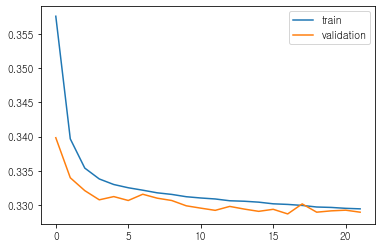

In [404]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [405]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [406]:
pred_df['TAG'].value_counts()

1    199015
0     41681
Name: TAG, dtype: int64

In [407]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[   272   2203]
 [ 41409 196812]]


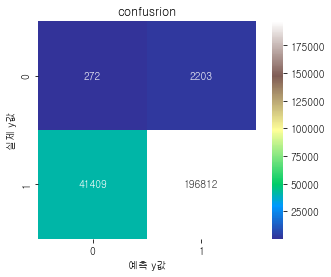

In [408]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [409]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9889
recall : 0.8262
f1-score : 0.9003
accuracy : 0.8188


# <font color = F21638> GRU

In [410]:
from keras.layers import GRU
model = Sequential()
model.add(GRU(20, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [411]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [412]:
model_path = path

In [423]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [424]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
56033/56034 [============================>.] - ETA: 0s - loss: 0.3558 - accuracy: 0.8059
Epoch 1: val_loss improved from inf to 0.34138, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 203s 4ms/step - loss: 0.3558 - accuracy: 0.8059 - val_loss: 0.3414 - val_accuracy: 0.8102
Epoch 2/200
56031/56034 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8096
Epoch 2: val_loss improved from 0.34138 to 0.33665, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
56034/56034 [==============================] - 194s 3ms/step - loss: 0.3410 - accuracy: 0.8096 - val_loss: 0.3366 - val_accuracy: 0.8115
Epoch 3/200
56033/56034 [============================>.] - ETA: 0s - loss: 0.3386 - accuracy: 0.8103
Epoch 3: val_loss did not improve from 0.33665
56034/56034 [==============================] - 194s 3ms/step - loss: 0.3386 - accuracy: 0.8103 - val_loss: 0.3379 - val_accuracy: 

In [415]:
model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 14s 2ms/step


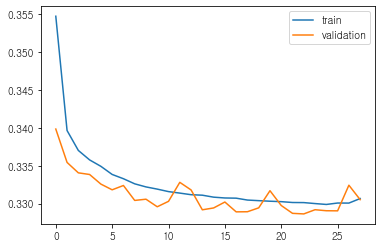

In [416]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [417]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [418]:
pred_df['TAG'].value_counts()

1    197997
0     42699
Name: TAG, dtype: int64

In [419]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[   269   2206]
 [ 42430 195791]]


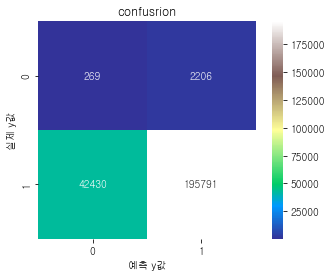

In [420]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [421]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9889
recall : 0.8219
f1-score : 0.8977
accuracy : 0.8146


# LSTM

In [502]:
dataset_3

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,1
2020-03-04 00:00:00,1,433,78,609,3.19,1
2020-03-04 00:00:00,2,464,154,608,3.19,1
2020-03-04 00:00:00,3,379,212,606,3.19,1
2020-03-04 00:00:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...
2020-04-30 23:59:00,835194,749,1740,319,3.21,1
2020-04-30 23:59:00,835195,755,1743,318,3.21,1
2020-04-30 23:59:00,835196,385,206,317,3.19,1


In [512]:
dataset_3 = dataset_3.drop(['NUM', 'INSP'], axis=1)
dataset_3

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
STD_DT,,,,
2020-03-04 00:00:00,489,116,631,1
2020-03-04 00:00:00,433,78,609,1
2020-03-04 00:00:00,464,154,608,1
2020-03-04 00:00:00,379,212,606,1
2020-03-04 00:00:00,798,1736,604,1
...,...,...,...,...
2020-04-30 23:59:00,749,1740,319,1
2020-04-30 23:59:00,755,1743,318,1
2020-04-30 23:59:00,385,206,317,1


In [513]:
split_date = int(dataset_3.shape[0]*0.7)

In [514]:
train = dataset_3[:split_date]
test = dataset_3[split_date:]

In [515]:
print(train.shape)
print(test.shape)

(561647, 4)
(240706, 4)


In [516]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [517]:
x_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

In [518]:
smote = SMOTE(random_state = 1)

X_train_over, y_train_over = smote.fit_resample(x_train_values, y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', x_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (561647, 3) (561647,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 (800488, 3) (800488,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    400244
0.0    400244
dtype: int64


In [519]:
len(X_train_over)

800488

In [520]:
X_train_over = pd.DataFrame(X_train_over, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT'])
y_train_over = pd.DataFrame(y_train_over, columns = ['TAG'])

In [521]:
X_train_over

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT
0,0.345420,0.035429,0.063013
1,0.238550,0.013714,0.060812
2,0.297710,0.057143,0.060712
3,0.135496,0.090286,0.060512
4,0.935115,0.961143,0.060312
...,...,...,...
800483,0.209924,0.015831,0.065332
800484,0.137405,0.096267,0.029490
800485,0.150763,0.078768,0.028331
800486,0.154580,0.084453,0.062823


In [522]:
#train dataset
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [523]:
test_sc = pd.DataFrame(test_sc, columns = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'TAG'])

In [524]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT']
label_cols = ['TAG']

In [525]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((240696, 10, 3), (240696, 1))

In [526]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.3)
x_train.shape, x_valid.shape

((560334, 10, 3), (240144, 10, 3))

In [528]:
path = "C:/Users/islab/Desktop/jihyeon/전자제조시스템"
os.chdir(path)

In [529]:
model_path = path

In [527]:
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [530]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [531]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 30, validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3653 - accuracy: 0.8040
Epoch 1: val_loss improved from inf to 0.34720, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 191s 10ms/step - loss: 0.3653 - accuracy: 0.8040 - val_loss: 0.3472 - val_accuracy: 0.8099
Epoch 2/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3434 - accuracy: 0.8092
Epoch 2: val_loss improved from 0.34720 to 0.34005, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 178s 10ms/step - loss: 0.3434 - accuracy: 0.8092 - val_loss: 0.3401 - val_accuracy: 0.8107
Epoch 3/200
18674/18678 [============================>.] - ETA: 0s - loss: 0.3392 - accuracy: 0.8100
Epoch 3: val_loss improved from 0.34005 to 0.33956, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 162

In [532]:
# model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 31s 4ms/step


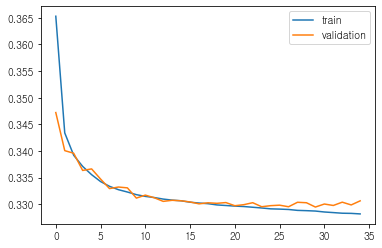

In [534]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [535]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [536]:
pred_df['TAG'].value_counts()

1    210583
0     30113
Name: TAG, dtype: int64

In [537]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[    98   2377]
 [ 30015 208206]]


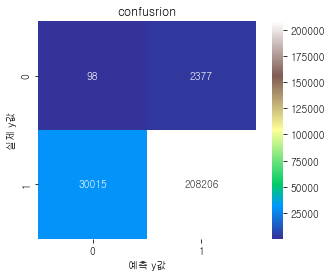

In [538]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [540]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 50)                10800     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [539]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9887
recall : 0.8740
f1-score : 0.9278
accuracy : 0.8654


# 저장 ~ 

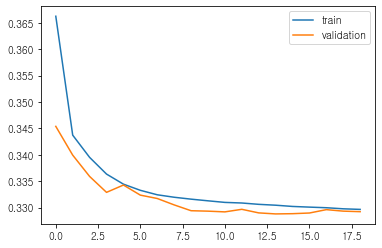

In [429]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [430]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [431]:
pred_df['TAG'].value_counts()

1    199654
0     41042
Name: TAG, dtype: int64

In [432]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[   238   2237]
 [ 40804 197417]]


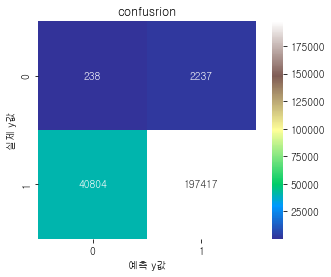

In [433]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [434]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9888
recall : 0.8287
f1-score : 0.9017
accuracy : 0.8212


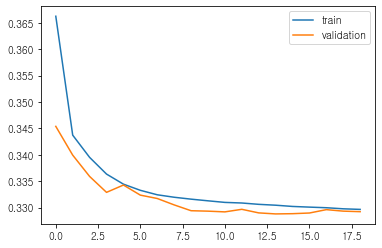

In [429]:
# bathc size = 50

plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

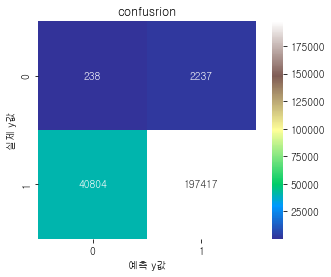

In [433]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [434]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9888
recall : 0.8287
f1-score : 0.9017
accuracy : 0.8212


## <font color = F21638> TCN

In [455]:
from tcn import TCN, tcn_full_summary
from keras.layers import Dropout
model = Sequential()
model.add(TCN(50, input_shape = (train_feature.shape[1], train_feature.shape[2]), return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [456]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [457]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 500,
                    validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
1121/1121 [==============================] - ETA: 0s - loss: 0.3526 - accuracy: 0.8055
Epoch 1: val_loss improved from inf to 0.34105, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
1121/1121 [==============================] - 1299s 1s/step - loss: 0.3526 - accuracy: 0.8055 - val_loss: 0.3411 - val_accuracy: 0.8014
Epoch 2/200
1121/1121 [==============================] - ETA: 0s - loss: 0.3383 - accuracy: 0.8108
Epoch 2: val_loss improved from 0.34105 to 0.33390, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
1121/1121 [==============================] - 1301s 1s/step - loss: 0.3383 - accuracy: 0.8108 - val_loss: 0.3339 - val_accuracy: 0.8124
Epoch 3/200
1121/1121 [==============================] - ETA: 0s - loss: 0.3361 - accuracy: 0.8123
Epoch 3: val_loss improved from 0.33390 to 0.33338, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
1121/1121 [==============================] - 1339s 1s/step - l

In [458]:
# model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 114s 15ms/step


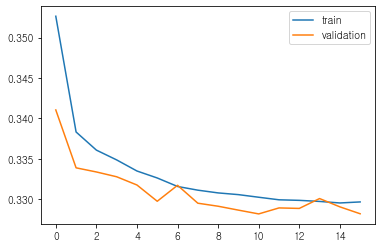

In [459]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [460]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [461]:
pred_df['TAG'].value_counts()

1    202462
0     38234
Name: TAG, dtype: int64

In [462]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[    87   2388]
 [ 38147 200074]]


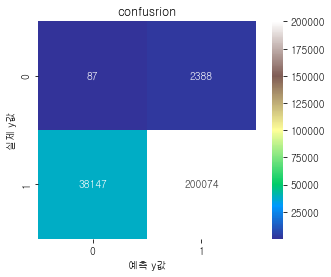

In [463]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [464]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9882
recall : 0.8399
f1-score : 0.9080
accuracy : 0.8316


# TCN activation = tanh,

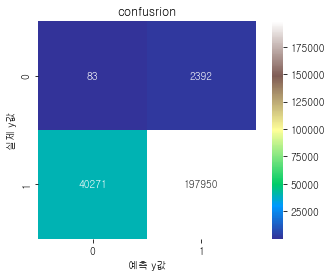

In [449]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [450]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9881
recall : 0.8310
f1-score : 0.9027
accuracy : 0.8228


# LSTM 

In [544]:
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(50, 
               input_shape = (train_feature.shape[1], train_feature.shape[2]), activation = 'tanh', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

In [545]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

In [546]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 30,
                    validation_data = (x_valid, y_valid), callbacks = [early_stop, checkpoint])

Epoch 1/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3646 - accuracy: 0.8037
Epoch 1: val_loss improved from inf to 0.35417, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 788s 42ms/step - loss: 0.3646 - accuracy: 0.8037 - val_loss: 0.3542 - val_accuracy: 0.8096
Epoch 2/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3482 - accuracy: 0.8090
Epoch 2: val_loss improved from 0.35417 to 0.34036, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 731s 39ms/step - loss: 0.3482 - accuracy: 0.8090 - val_loss: 0.3404 - val_accuracy: 0.8096
Epoch 3/200
18677/18678 [============================>.] - ETA: 0s - loss: 0.3388 - accuracy: 0.8111
Epoch 3: val_loss improved from 0.34036 to 0.33657, saving model to C:/Users/islab/Desktop/jihyeon/전자제조시스템\tmp_checkpoint.h5
18678/18678 [==============================] - 750

In [547]:
# model.load_weights(filename)

pred = model.predict(test_feature)

7522/7522 [==============================] - 65s 9ms/step


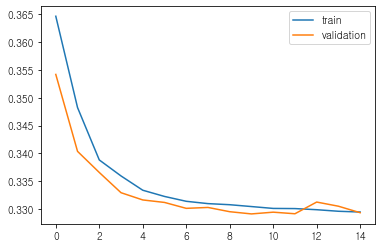

In [548]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [549]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x>=0.5 else 0)

In [550]:
pred_df['TAG'].value_counts()

1    209346
0     31350
Name: TAG, dtype: int64

In [551]:
confusion = confusion_matrix(test_label, pred_df)
print(confusion)

[[    49   2426]
 [ 31301 206920]]


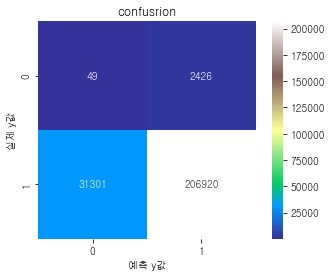

In [552]:
plot = sns.heatmap(confusion ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("confusrion", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [553]:
p = precision_score(test_label, pred_df)
print('precision : %0.4f' %p)
r = recall_score(test_label, pred_df)
print('recall : %0.4f' %r)
f1 = f1_score(test_label, pred_df)
print('f1-score : %0.4f' %f1)
acc = accuracy_score(test_label, pred_df)
print('accuracy : %0.4f' %acc)

precision : 0.9884
recall : 0.8686
f1-score : 0.9246
accuracy : 0.8599
